# Demo: The Period Doubling Route to Chaos in the Discrete Logistic Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
%matplotlib inline
%config InlineBackend.figure_format='retina'

# create nice fonts for plots
# ATTN: if you don't have LATEX installed on your computer, please comment this out!
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In this demo, we'll understand how complicated the dynamics associated to simple difference equations can be. 

### Recommended Reading

Gerda de Vries, Thomas Hillen, Mark Lewis, Johannes Müller, Birgitt Schönfisch, *A Course in Mathematical Biology*, SIAM, 2006. https://epubs.siam.org/doi/book/10.1137/1.9780898718256


Leah Edelstein-Keshet, *Mathematical Models in Biology*, Birkhauser-Random House 1988, https://epubs.siam.org/doi/book/10.1137/1.9780898719147 (reprint edition)


Mark Kot, *Elements of Mathematical Ecology*, Cambridge, 2001. https://www.cambridge.org/core/books/elements-of-mathematical-ecology/6F91A5D3AB89EECE130825ED5529B8DE 

We study the **discrete logistic model (DLM)**: for a given parameter $r\in [0,4]$ and an initial state $x_0$, 
$$
x_{n+1} = r x_{n} \left(1-x_{n}\right). 
$$
We have shown in class that, as long as $x_0\in [0,1]$, we can be sure that $x_{n}\in [0,1]$ for all $n=1,2,3,...$ . Additionally, we have shown that...

1) For $r\in [0,1)$, the unique nonnegative equilibrium $x_{*,0} = 0$ is asymptotically stable. 

2) For $r\in (1,3)$, there are two equilibria $x_{*,0} = 0$ and $x_{*,1}=\frac{r-1}{r}$. $x_{*,0}$ is unstable and $x_{*,1}$ is asymptotically stable. 

3) For $r\in (3,4)$, there are still two equilibria, but they are both unstable. 

We already know that the qualitative behaviour of the system for $r\in (1,3)$ appears to be the most biologically realistic, since populations tend towards the carrying capacity of their environment. This raises the question of what happens when $r>3$, which we answer here via numerical simulations. 

Some new math vocabulary: since the behaviour of DLM changes dramatically when parameter values pass through $r=1$ and $r=3$, we call these numbers **bifurcation values**. 

First, let's write a function that simulates DLM for $N$ steps at a particular value of $r$ and a particular initial state $x_0$. 

In [2]:
def simulate(r,x0,N):
    
    x = np.zeros(N+1, dtype=float)

    x[0] = x0 # must prescribe initial state
    
    for n in range(1,N+1):
        
        x[n] = r*x[n-1]*(1-x[n-1])
        
    return x

Let's test our code by simulating DLM with $r=1.9$ and $x_0=0.1x_{*,1}$. This should give us a shape that looks roughly like logistic growth. 

In [3]:
x_a = simulate(1.9, 0.1*(1.9-1.)/1.9, 10)

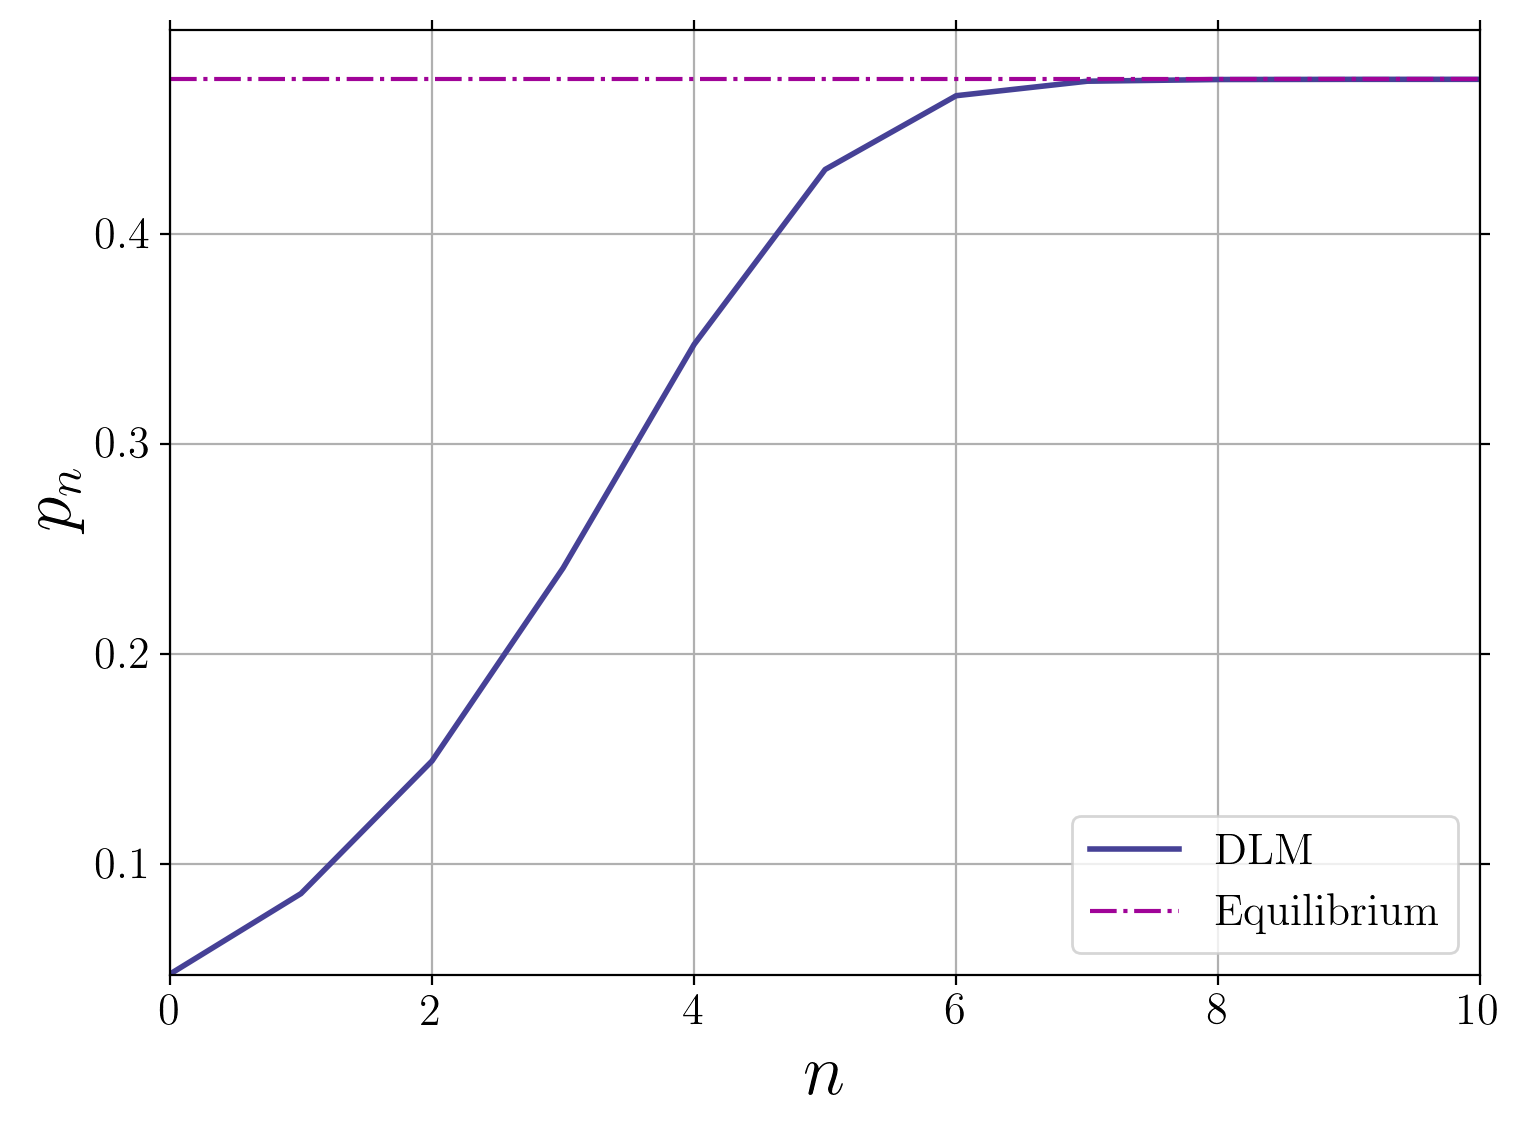

In [4]:
fig, ax =plt.subplots()   

plt.plot(np.arange(0,11), x_a, color='xkcd:blueberry', linestyle='solid', label='DLM', linewidth=2)
plt.plot(np.arange(0,11), (1.9-1.)/1.9*np.ones_like(np.arange(0,11)), '-.', color='xkcd:barney purple', label='Equilibrium')

plt.xlabel(r"$n$", fontsize=26, color = 'k')
plt.ylabel(r"$p_{n}$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=8)
ax.locator_params(axis='x', nbins=8)

ax.legend(fontsize=16, loc= 'lower right')

plt.xlim([0,10])
plt.ylim([0.99*x_a[0], 1.05*x_a[-1]])

plt.frameon = True 
plt.grid(visible=True)

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'dlm_sim_stable.png'
#plt.savefig(figname, dpi=600)

plt.show()

This picture is exactly what we expected to see! The stable attractor is just the nontrivial equilibrium point.

Now, what happens when we're just above the bifurcation value $r=3$? Let's try $r=3.1$. We again start at $x_0 = 0.1x_{*,1}$. 

In [5]:
r_try = 3.1 # with an eye towards changing it later :) 
N_try = 30
x_b = simulate(r_try, 0.1*(r_try-1.)/r_try,N_try)  

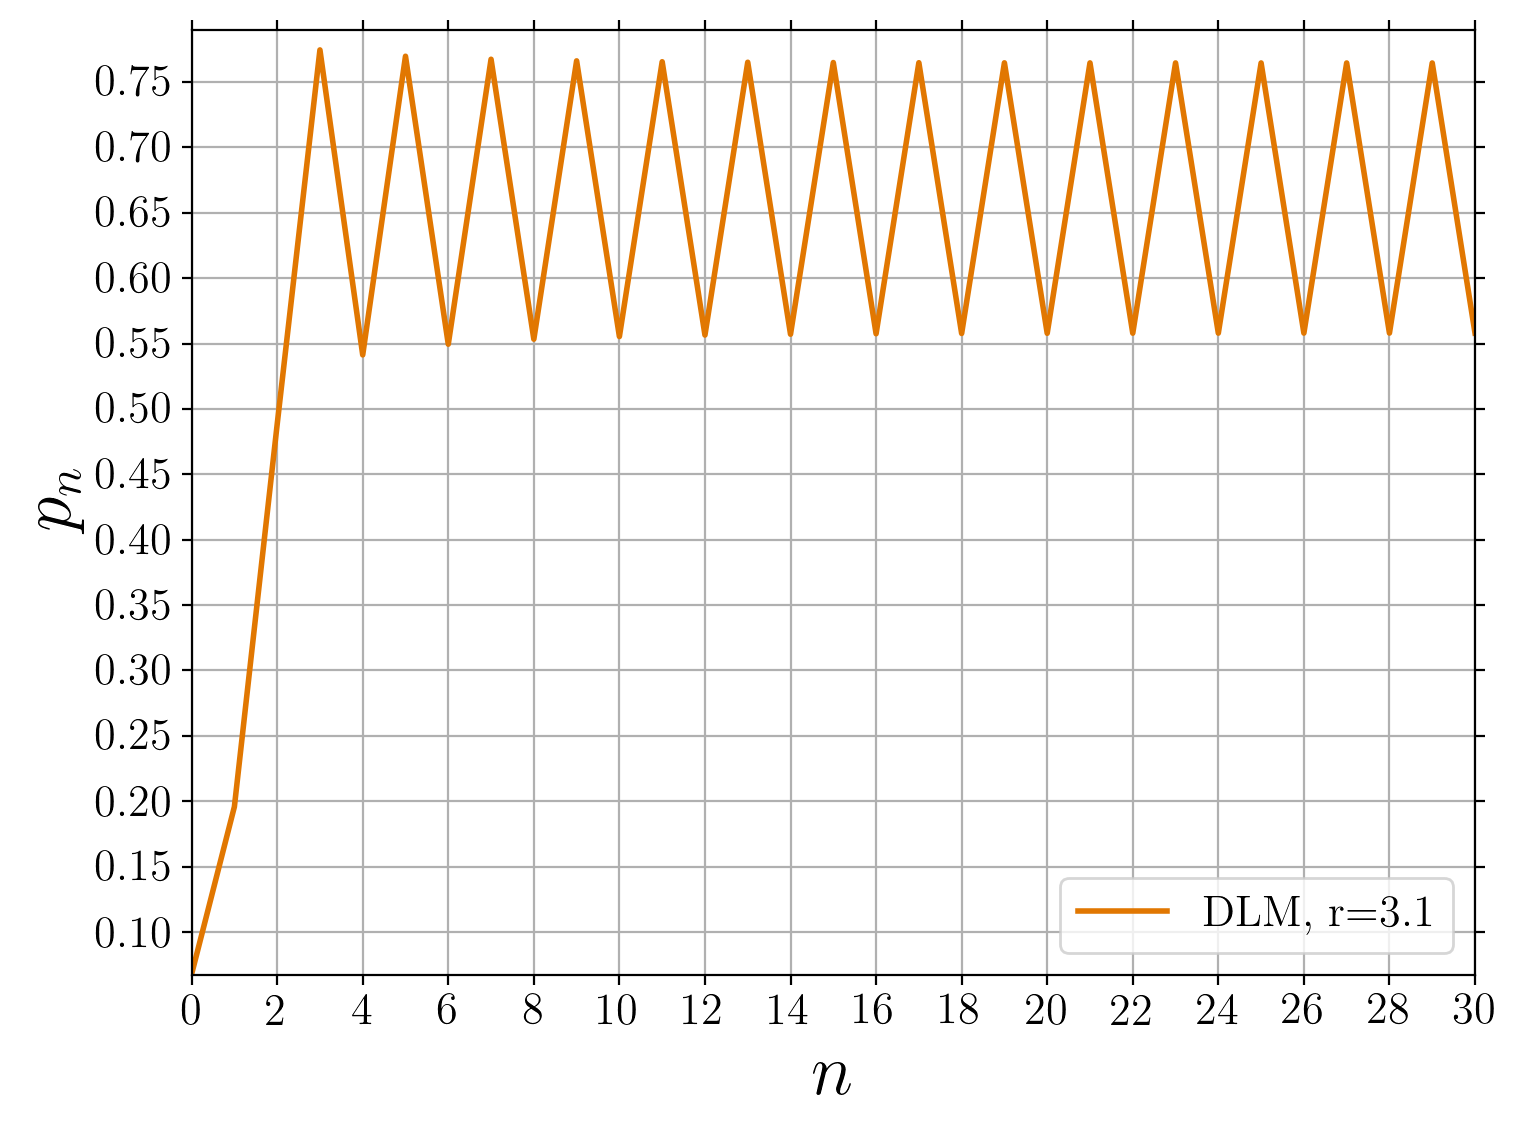

In [6]:
fig, ax =plt.subplots()   

plt.plot(np.arange(0,N_try+1), x_b, color='xkcd:pumpkin', linestyle='solid', label='DLM, r=%.1f' % r_try, linewidth=2)

plt.xlabel(r"$n$", fontsize=26, color = 'k')
plt.ylabel(r"$p_{n}$", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=21)
ax.locator_params(axis='x', nbins=21)

ax.legend(fontsize=16, loc= 'lower right')

plt.xlim([0,N_try])
plt.ylim([0.99*np.amin(x_b), 1.02*np.amax(x_b)])

plt.frameon = True 
plt.grid(visible=True)

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'dlm_sim_r=%.1f' % r_try +'.png'
#plt.savefig(figname, dpi=600)

plt.show()

Thus, the stable attractor has transformed from an equilibrium point into a $2$-periodic orbit as we pass through the bifurcation value! Pretty cool. For an exact computation of the $2$-periodic orbit (it's not hard, it's just a little tedious) see p.48 of Edelstein-Keshet.

What if we play the same game again, with a larger $r$? We can do this just by running the two code boxed above with a different $r$. What do we see? 

1) At about $r=3.5$, we see the stable attractor transform into a $4$-periodic orbit. 

2) At about $r=3.6$, we see that periodicity appears to be lost! The movement of $p_n$ seems to involve wild oscillations with seemingly little structure. This persists even if you let the simulation run for a very long time. 

3) At $r=3.83$, long-time simulations show that, even though the trajectory starts looking pretty complicated, it eventually tends to a stable $3$-periodic orbit! You may have to zoom in on the large-time behaviour to really see this periodic orbit. 

4) At $r=3.9$, we're back to wild oscillations. 

By varying the initial state as well as $r$, one finds that $r=3.6$, $r=3.9$, and many other values of $r$ give rise to **chaos**: this refers to non-periodic, bounded oscillations that change drastically when the initial state is varied slightly. 

The numerical experiments above indicate that the qualitative behaviour of DLM has a pretty complicated dependence on $r$: stable attractors can change their shape dramatically (for instance, the stable $2$-periodic orbit appears, then disappears, then appears again). That is, $r=1,3$ are not the ony bifurcation values. Can we try and find the other bifurcation values on the computer, or at least get some quantiative idea of how the transition from periodicity to chaos depends on $r$? 

To answer the above question, we need to draw the **bifurcation diagram** for DLM. This is a plot where the horizontal axis is the parameter $r$, and the vertical axis is the stable attractor corresponding to that $r$.

The cell below performs the computations necessary to draw the full bifurcation diagram for the logistic model. We use the approach in de Vries et al. :

1) First, perform a lot of long-time ($2000$ steps) simulations over the parameter range $r \in \left[r_{\text{min}}, r_{\text{max}}\right]$. We take at least a thousand $r$-values (and up to fifty thousand) from this interval in practice.

2) Then, sample the last $100$ steps of the simulation. This will give us (approximately) the stable attractor for each $r$-value. 

3) Finally, we plot our approximate stable attractors against the chosen $r$-values. 

Since we're performing so many computations, the code box below can take around $5$ minutes to run! So please be patient :) 

In [7]:
rmin=1.0001 # smallest parameter value to look at 
rmax=3.9999 # largest parameter value to look at 
num_r_samples= int(5e4) # number of parameter values we want to try
N=int(2e3) # number of time steps we perform in each sample
tail_size= 100 # size of the "tail" of the simulation we look at to identify the attractor
    
# create array of params to try
rr = np.linspace(rmin, rmax, num = num_r_samples, endpoint=True)

# pre-allocate storage for the tails (~ our attractors) 
tails = np.zeros([tail_size, num_r_samples])
    
for m in range(0,num_r_samples): 
    
    r = rr[m] # pick param
    
    x0 = 0.9*(r-1.)/r  # get initial state: make it close to equilibrium just for fun
    x = simulate(r, x0, N) # perform simulate
    tail = x[-tail_size:] # estimate attractor from the tail
    
    tails[:, m] = tail # store attractor guess for that param value

With the simulation done (thank you for your patience), we can draw out the bifurcation diagram: 

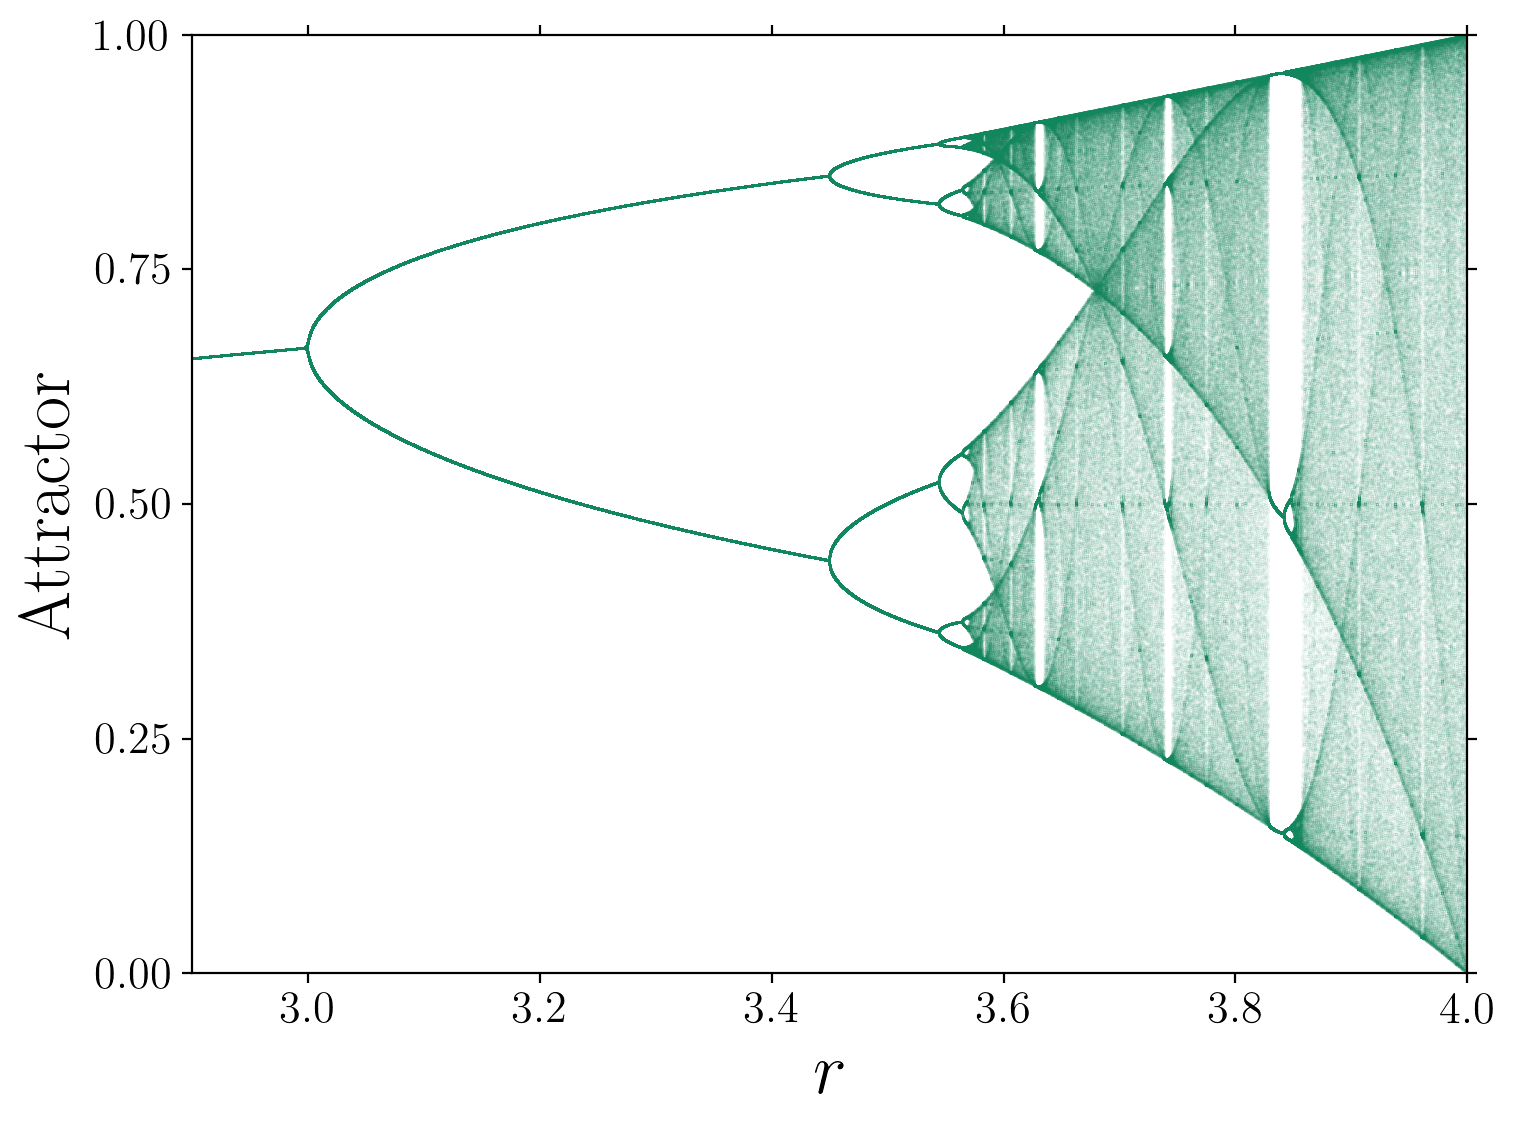

In [8]:
fig, ax =plt.subplots() 

plt.scatter(np.ravel(np.tile(rr,tail_size)),np.ravel(tails), s=1e-4, color='xkcd:dark sea green')
plt.xlabel(r"$r$", fontsize=26, color = 'k')
plt.ylabel(r"Attractor", fontsize=26, color='k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=4)
ax.locator_params(axis='x', nbins=8)

plt.xlim([2.9, 4])
plt.ylim([0, 1])

plt.frameon = True 

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'dlm_bifurcation_diagram.png'
#plt.savefig(figname, dpi=700)

plt.show()

Wow! This is the kind of image that makes us remember why we love numbers. 

Reading this plot is a bit tough, so I'll talk you through it a bit. The horiztonal axis shows our parameter $r$, and the vertical axis plots the shape of the attractor for that particular $r$. For $r<3$, we know the attractor is a single point: the stable equilibrium $x_{*,1}$. For $r$ between $3$ and about $3.5$, we get two points on the attractor, corresponding to a $2$-periodic orbit: the period of the attractor has doubled from $1$ to $2$. The $2$-periodic orbit then splits into an attractor with four points, hence a $4$-periodic orbit. The period has doubled again! Looking at the picture, we see the period keeps doubling until we get an attractor that is way too complicated to describe just before $r=3.6$: this represents the onset of chaos. This complicated, chaotic structure persists with the exception of a few "periodic windows" where the periodic orbits briefly become attractors again (say, around $3.8$!). 

So, $r$ has more bifurcation values than we can enumerate, but they can at least be visualized. 

Since chaos arose in this system after several successive period-dubling bifurcations, the diagram above is sometimes referred to as the **period-doubling route to chaos**. 

I encourage you to play with the above code to draw the bifurcation diagram for the Ricker model. 